# Homework 2 - Machine Learning Pipeline EDA
#### Author: Kunyu He, CAPP'20

In [1]:
import sys
sys.path.append('../codes/')

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import viz

In [3]:
INPUT_DIR = "../data/"
OUTPUT_DIR = "./images/"
NON_NUMERIC = ["PersonID", "zipcode", "SeriousDlqin2yrs"]

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['figure.dpi'] = 400

sns.set(style="white")

## 1. Load Data

Load data into our working environment. Skip all rows that contain any missing values.

In [5]:
data, data_types = viz.read_clean_data("data_types.json", "credit-data.csv",
                                       drop_na=True)
data = data.astype(data_types)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33042 entries, 0 to 41015
Data columns (total 13 columns):
PersonID                                33042 non-null int64
SeriousDlqin2yrs                        33042 non-null int32
RevolvingUtilizationOfUnsecuredLines    33042 non-null float64
age                                     33042 non-null int32
zipcode                                 33042 non-null object
NumberOfTime30-59DaysPastDueNotWorse    33042 non-null int32
DebtRatio                               33042 non-null float64
MonthlyIncome                           33042 non-null float64
NumberOfOpenCreditLinesAndLoans         33042 non-null int32
NumberOfTimes90DaysLate                 33042 non-null int32
NumberRealEstateLoansOrLines            33042 non-null int32
NumberOfTime60-89DaysPastDueNotWorse    33042 non-null int32
NumberOfDependents                      33042 non-null int32
dtypes: float64(3), int32(8), int64(1), object(1)
memory usage: 2.5+ MB


Extract numeric columns from the data set.

In [6]:
numerics = data[[col for col in data.columns if col not in NON_NUMERIC]]
nvt = pd.concat([numerics, data.SeriousDlqin2yrs], axis=1)

In [7]:
numerics.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [8]:
numerics.drop(['age', 'DebtRatio'], axis=1, inplace=True)
numerics.columns

D:\PythonEnv\envs\intel\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Index(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## 2. EDA

### 2.1 Categorical Variables - Bar Charts

First check the frequencies of two discrete variables `SeriousDlqin2yrs` and `zipcode`.

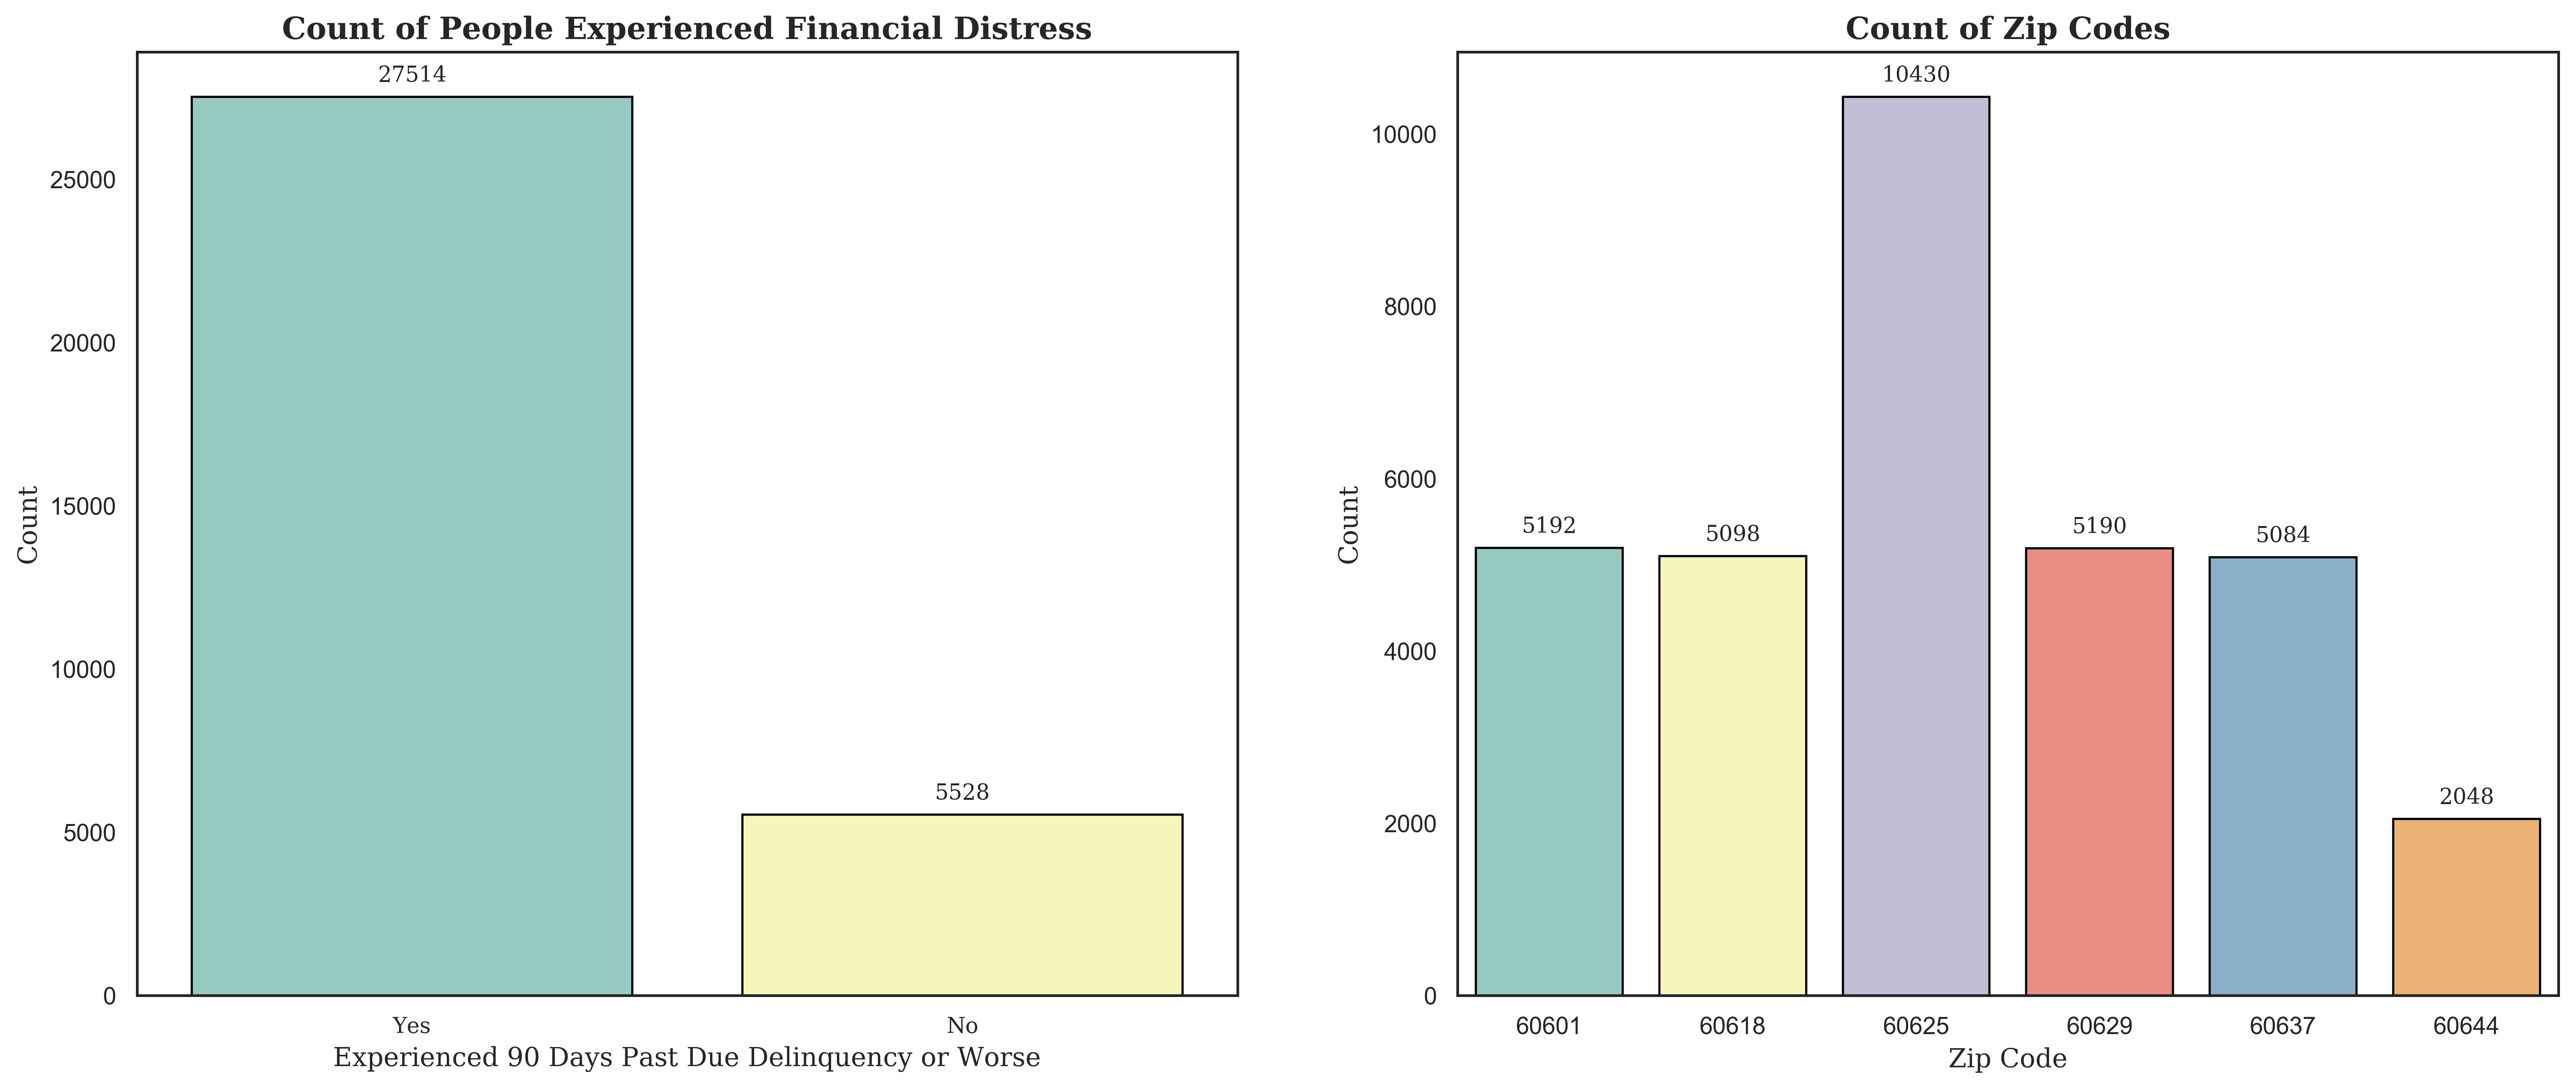

In [9]:
fig = plt.figure(figsize=[20, 8])
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

viz.bar_plot(ax0, data, "SeriousDlqin2yrs", sub=False,
             labels=["Count of People Experienced Financial Distress",
                     "Experienced 90 Days Past Due Delinquency or Worse",
                     "Count"], x_tick=[["Yes", "No"], None])

viz.bar_plot(ax1, data, "zipcode", sub=False,
             labels=["Count of Zip Codes", "Zip Code", "Count"])

plt.savefig(OUTPUT_DIR + 'figure-1.png')

We can see that in our sample, over 80% of observations have experienced 90 days past due delinquency or worse. And number of observations from zip code 60625 is much higher than the average, while that of observations from zip code 60644 is much lower than the average.

### 2.2 Numeric Variables

### 2.2.1 Correlation Matrix

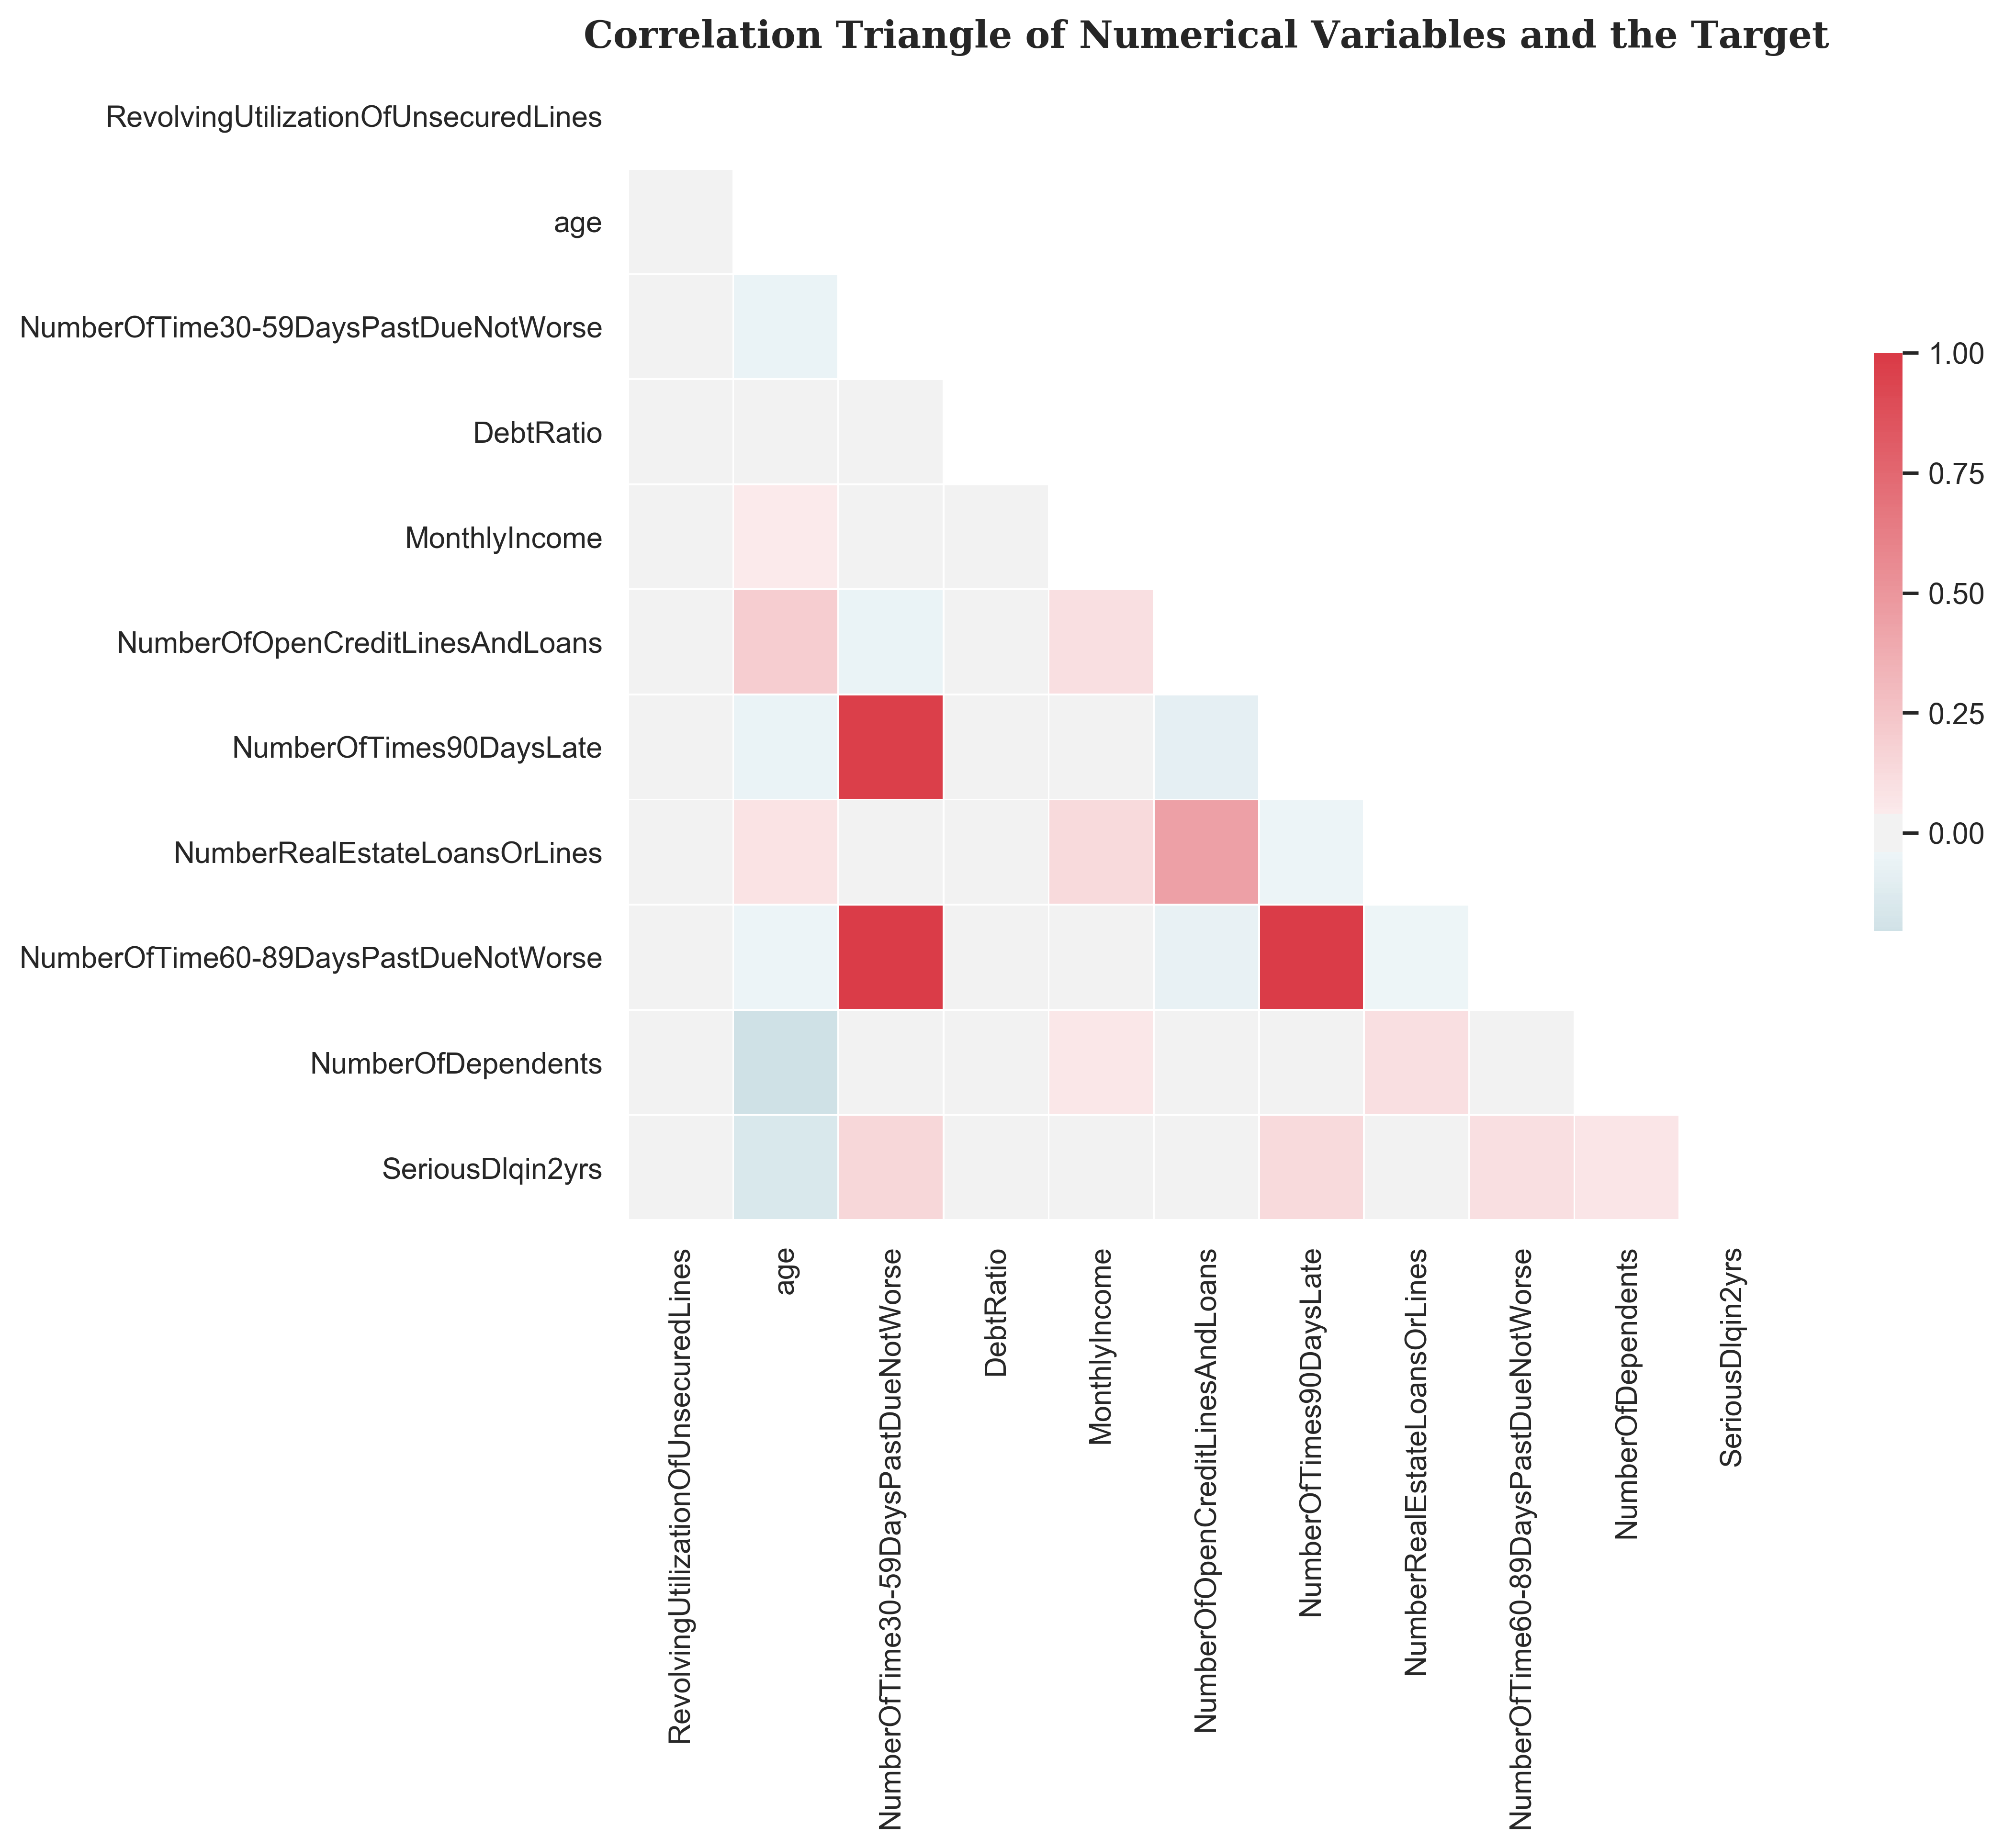

In [10]:
fig, ax = plt.subplots()
viz.corr_triangle(ax, nvt,
                  plot_title="Correlation Triangle of Numerical Variables and the Target")

plt.savefig(OUTPUT_DIR + 'figure-2.png')

We can see here our target, `SeriousDlqin2yrs`, is relatively positively correlated with **number of times borrower has been 30-59, 60-89, and 90+ days past due in the last 2 years** and **number of dependents in family excluding themselves**, and it's negatively correlated with **age**.

As expected, **number of times borrower go past due in the last 2 years are strongly correlated**. Consider combine those three variables in the feature engineering part.

### 2.2.2 Box Plots

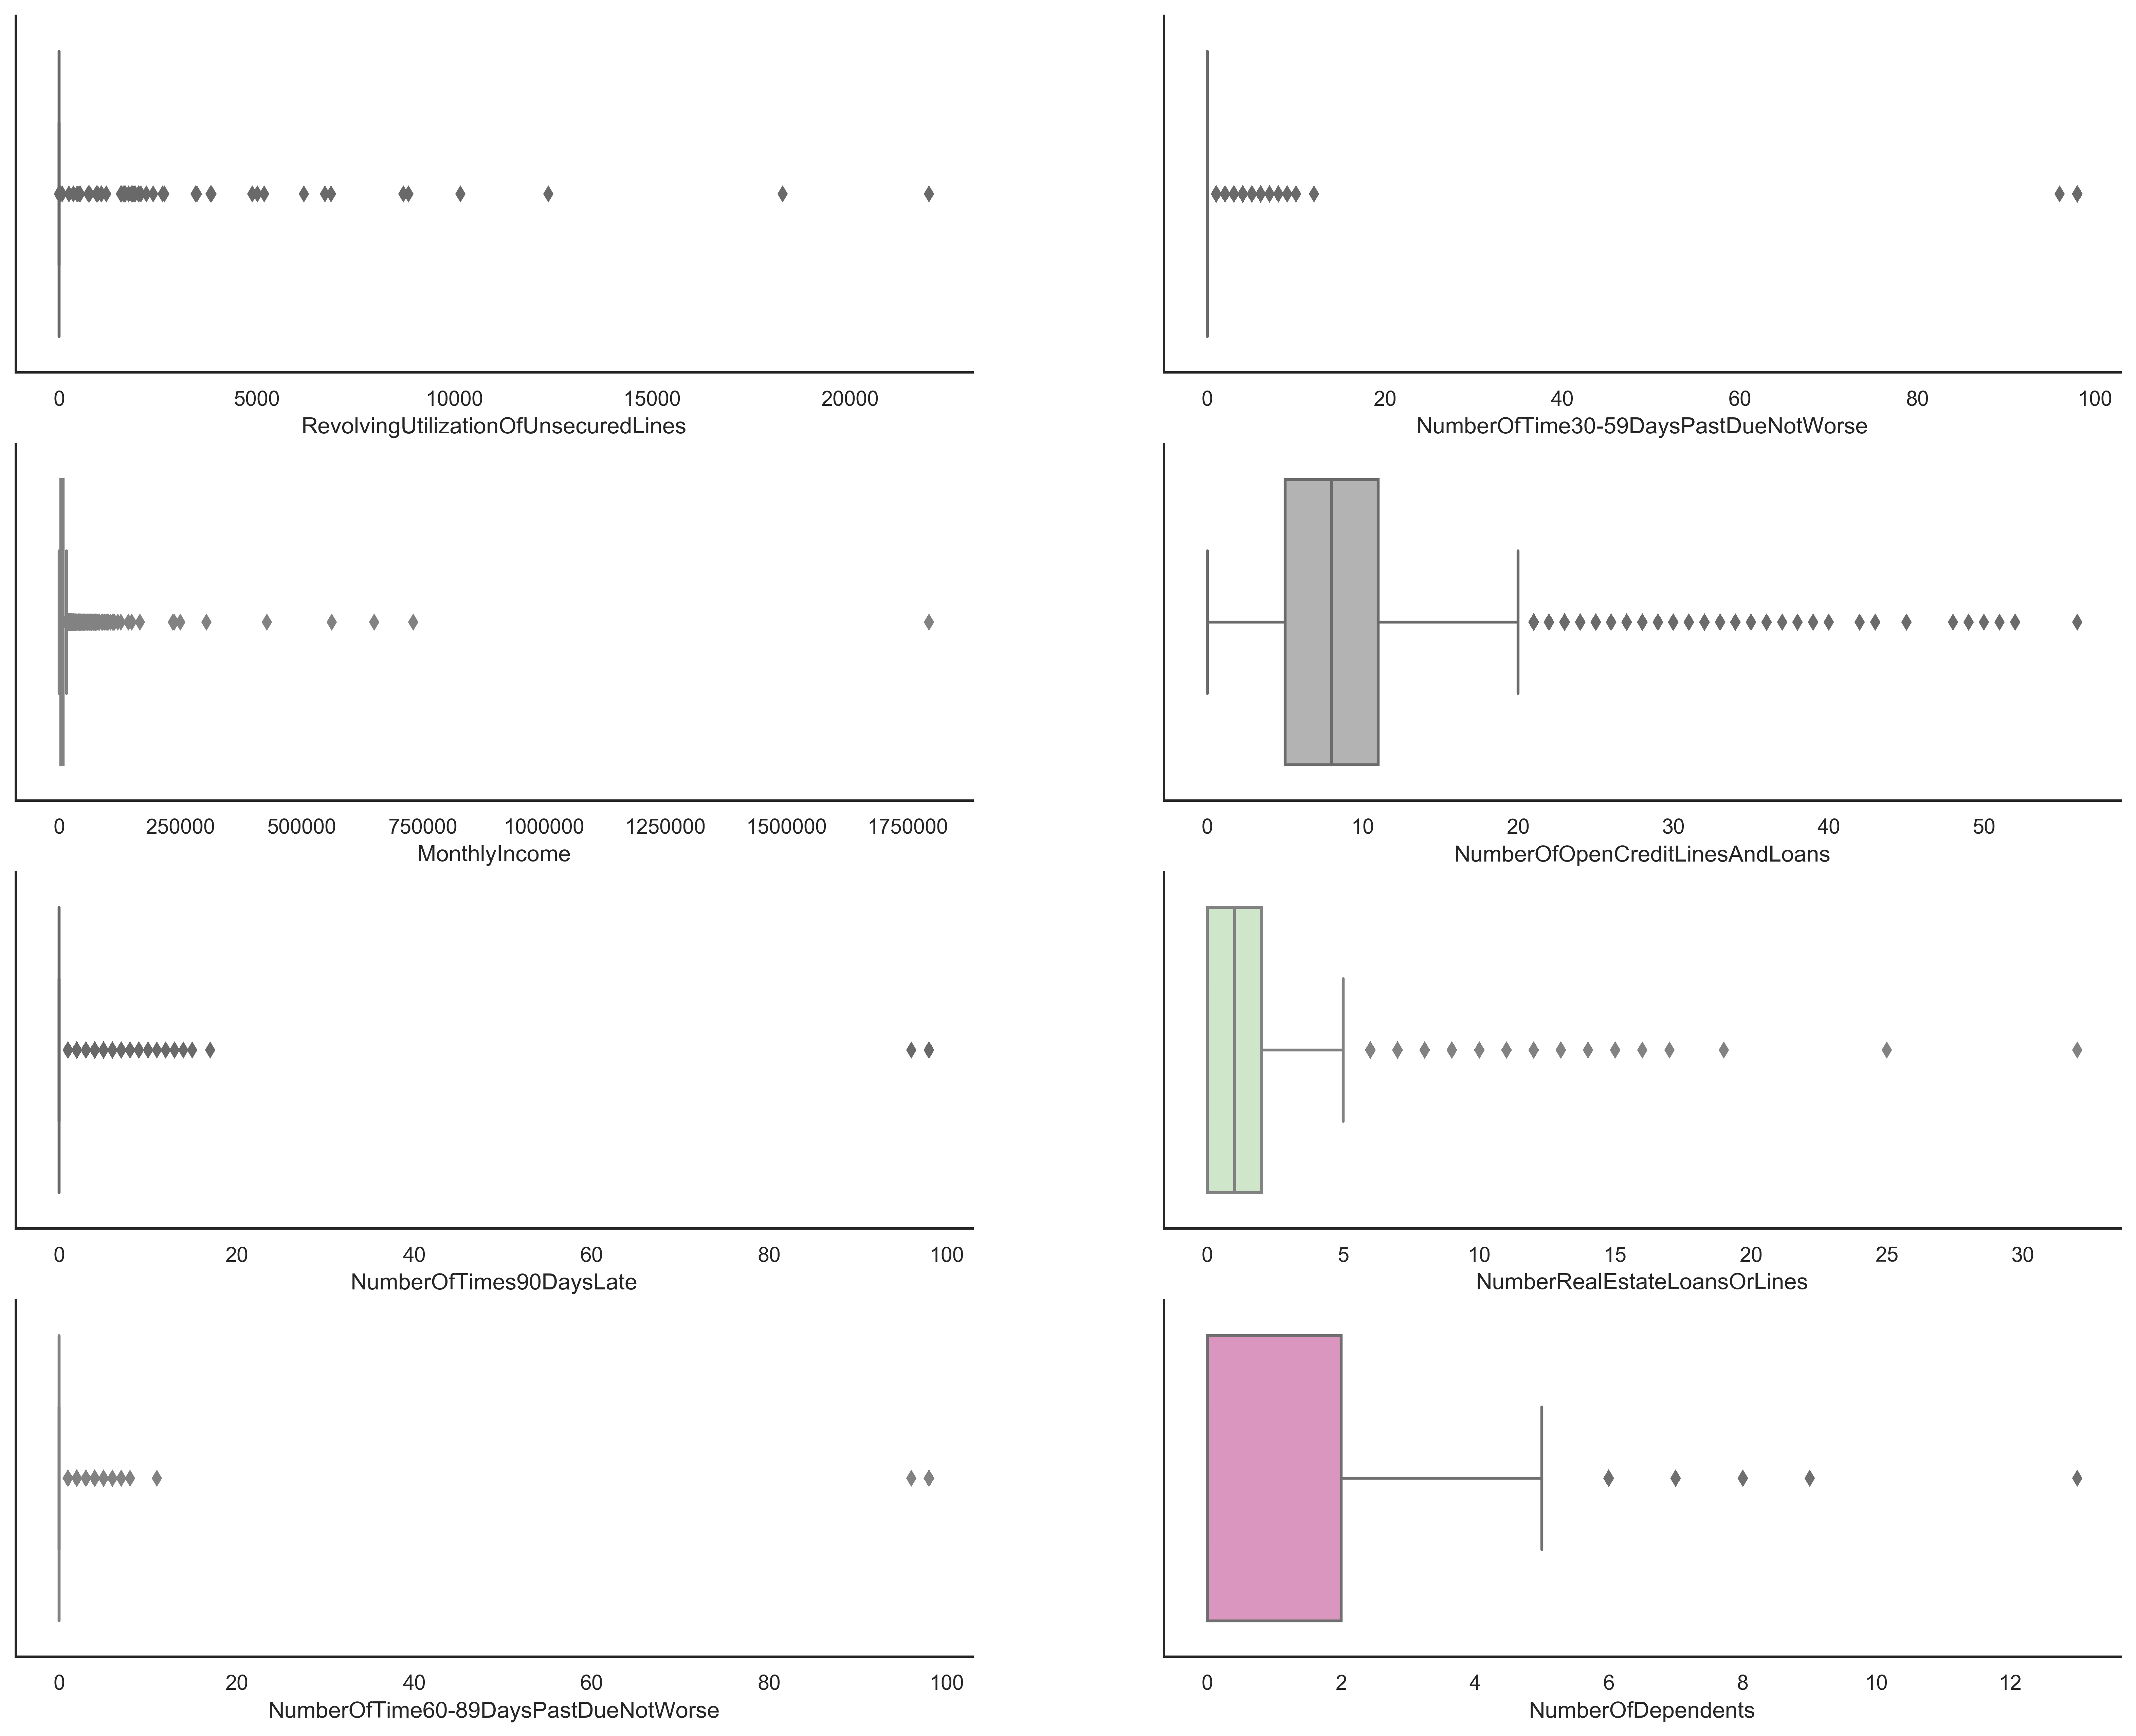

In [11]:
viz.box_plot(numerics)

plt.savefig(OUTPUT_DIR + 'figure-3.png')

There are a lot of outliers in our numerical data. As we would combine the number of times borrower go past due in the last 2 years, that wouldn't be a problem. But we should take care of the most extreme outliers in `DebtRatio` and `MonthlyIncome`.

### 2.2.3 Histograms

With so many outliers in our numerical data matrix, it's hard to describe their distribution in detail. So we limit the x-axis in the range of minimum to 95% quantile for better visualization below.

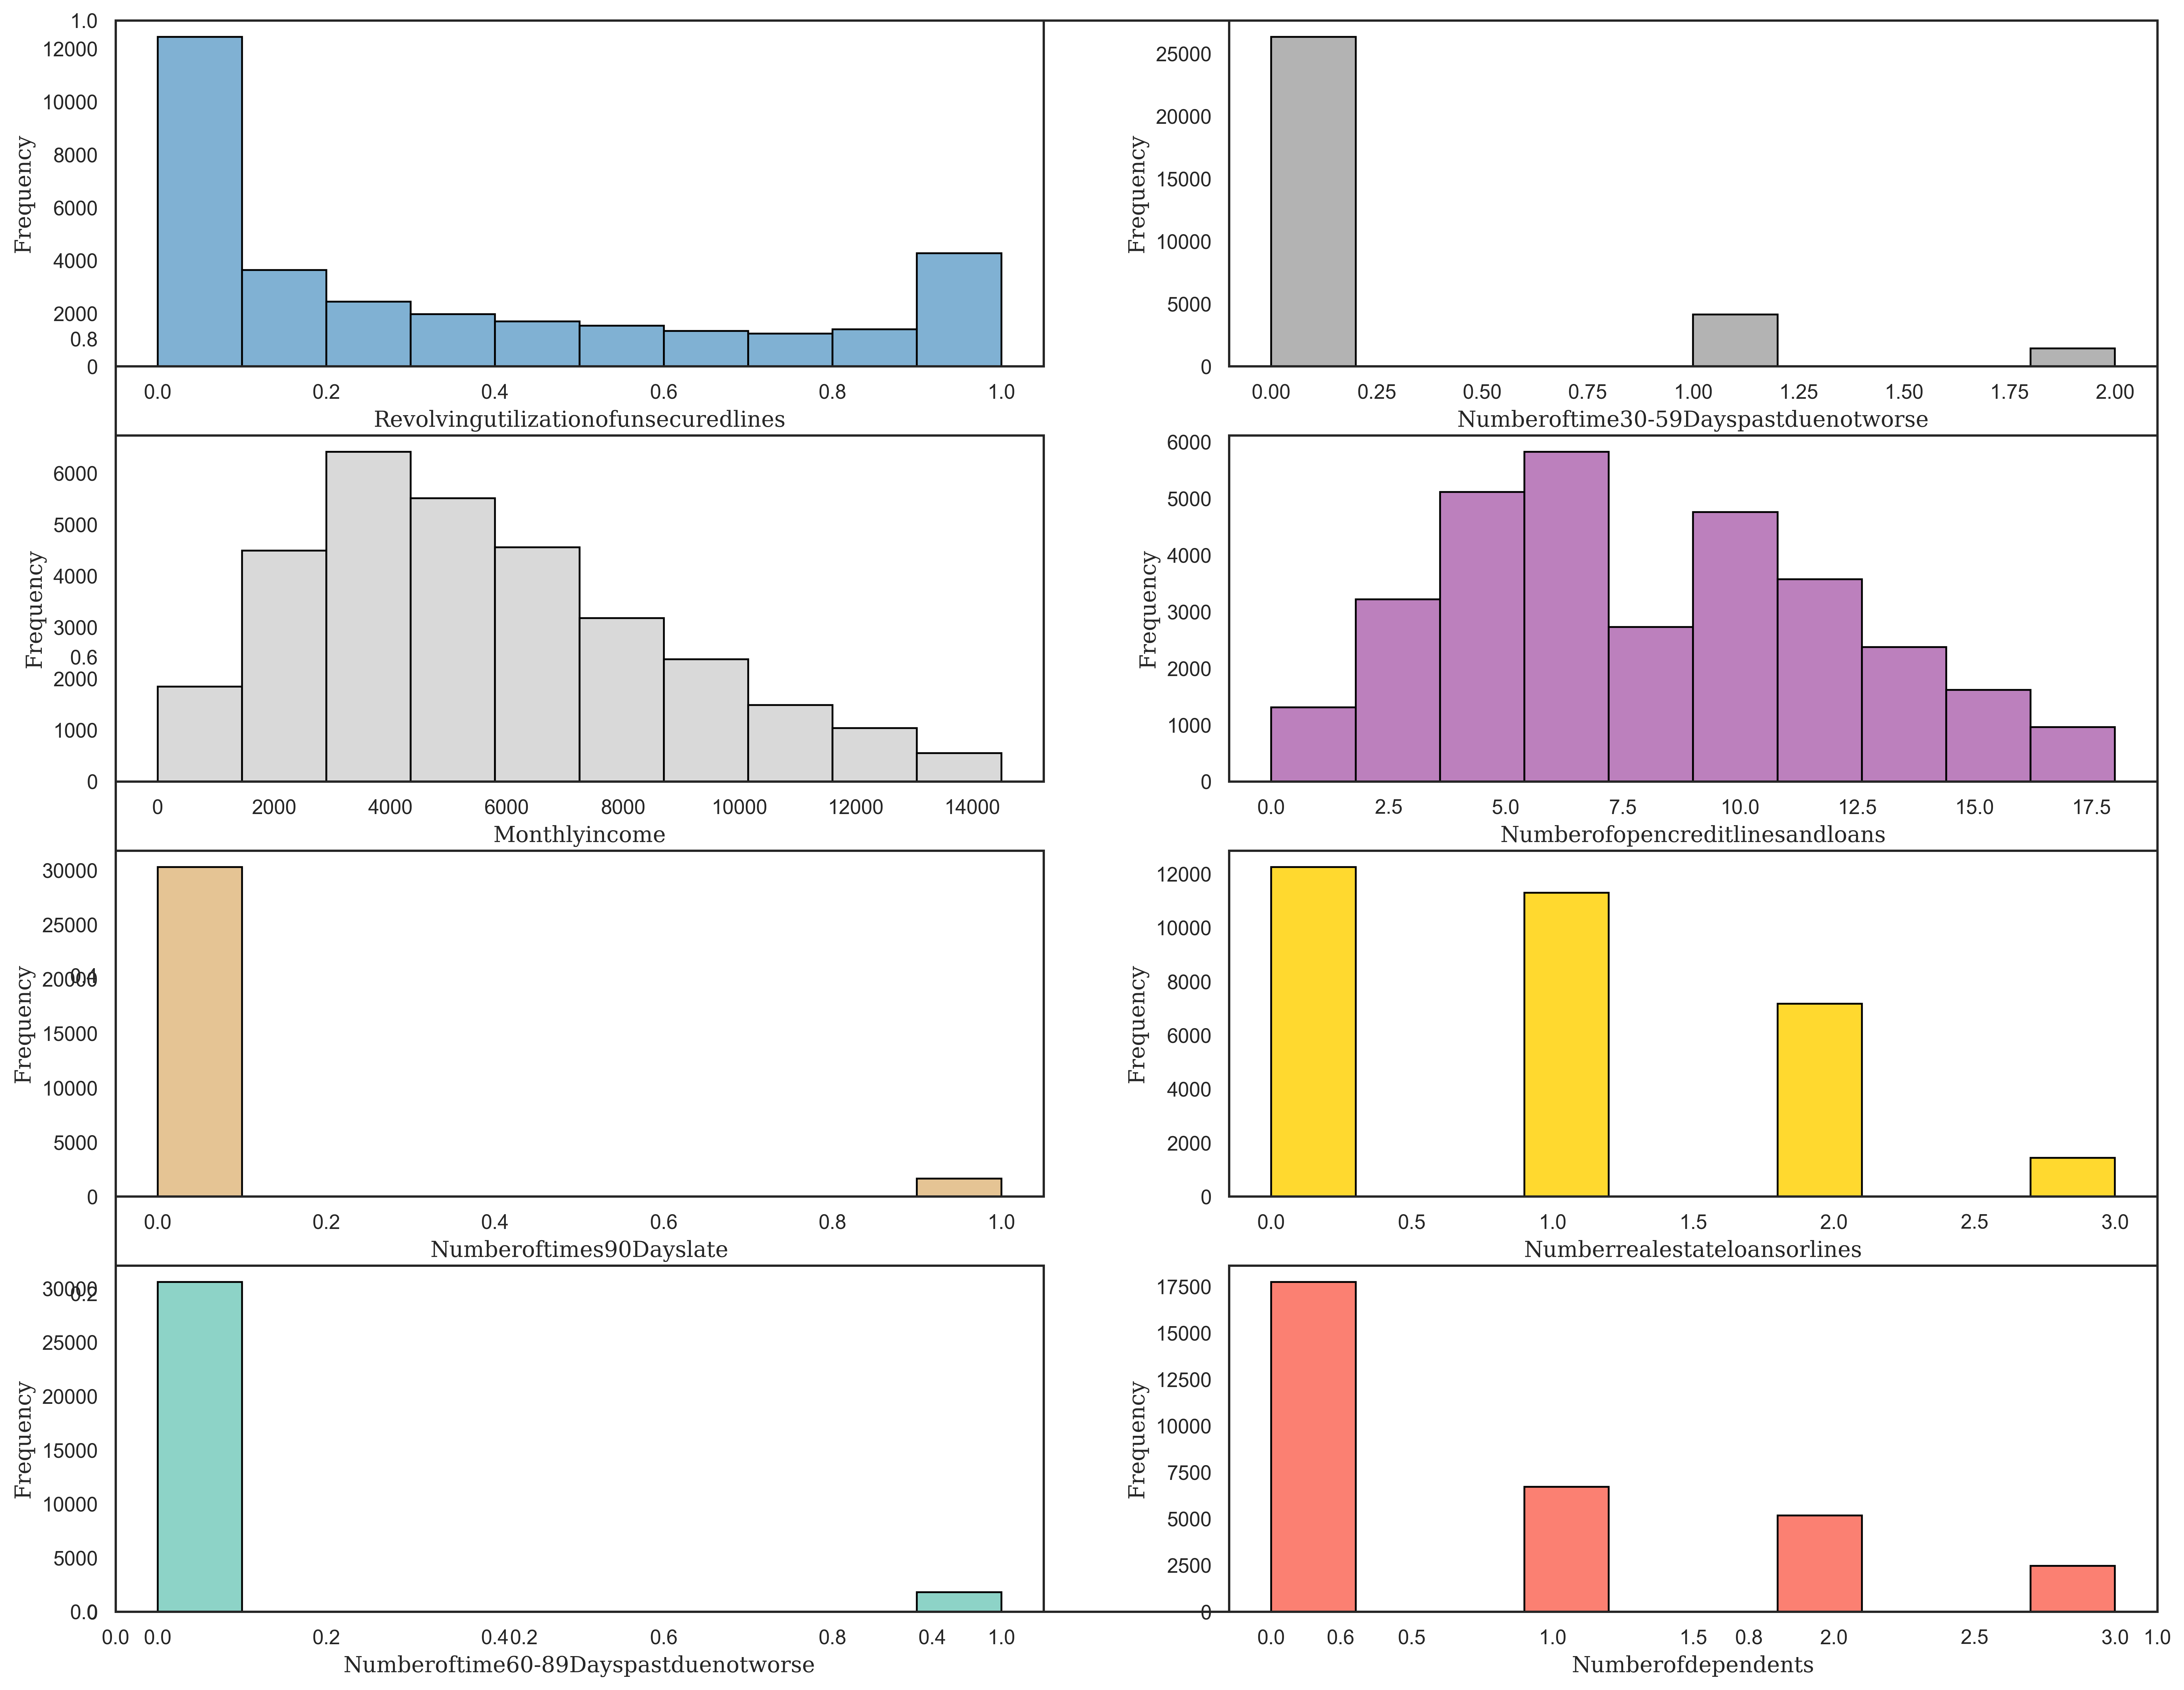

In [12]:
viz.hist_panel(numerics, cut=True)

plt.savefig(OUTPUT_DIR + 'figure-4.png')